## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

2023-10-17 18:57:12.255670: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns.
first_application_df= application_df.drop(columns = ['EIN', 'NAME', 'USE_CASE', 'SPECIAL_CONSIDERATIONS'])
first_application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,Association,1,0,5000,1
1,T3,Independent,C2000,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Trust,1,100000-499999,142590,1
...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,Association,1,0,5000,0
34295,T4,CompanySponsored,C3000,Association,1,0,5000,0
34296,T3,CompanySponsored,C2000,Association,1,0,5000,0
34297,T5,Independent,C3000,Association,1,0,5000,1


In [3]:
# Determine the number of unique values in each column.
first_application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
type_counts=  first_application_df['APPLICATION_TYPE'].value_counts()
type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(type_counts.iloc[8:].index)
cutoff_value = 1000
# Replace in dataframe
for app in application_types_to_replace:
    first_application_df['APPLICATION_TYPE'] = first_application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
first_application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at INCOME_AMT value counts for binning
Income_types = first_application_df['INCOME_AMT'].value_counts()
Income_types

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [7]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
incomes_to_replace = list(Income_types.iloc[5:].index)
cutoff_value_classifications = 1883

# Replace in dataframe
for cls in incomes_to_replace:
    first_application_df['INCOME_AMT'] = first_application_df['INCOME_AMT'].replace(cls,"Other")
    
# Check to make sure binning was successful
first_application_df['INCOME_AMT'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
Other             1107
1M-5M              955
1-9999             728
Name: INCOME_AMT, dtype: int64

In [8]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(first_application_df)
dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_Other
0,1,5000,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,108590,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,5000,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [9]:
# Split our preprocessed data into our features and target arrays
y = dummies['IS_SUCCESSFUL'].values
X = dummies.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 80

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                4950      
                                                                 
 dense_1 (Dense)             (None, 80)                4080      
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 9111 (35.59 KB)
Trainable params: 9111 (35.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [13]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)


Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.5786 - accuracy: 0.7167
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5617 - accuracy: 0.7246
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5573 - accuracy: 0.7282
Epoch 4/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5553 - accuracy: 0.7278
Epoch 5/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5538 - accuracy: 0.7299
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5541 - accuracy: 0.7303
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5526 - accuracy: 0.7289
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5516 - accuracy: 0.7308
Epoch 9/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5508 - accuracy: 0.7304
Epoch 10/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5506 - accura

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5544 - accuracy: 0.7353 - 950ms/epoch - 4ms/step
Loss: 0.5544345378875732, Accuracy: 0.735276997089386


<Axes: >

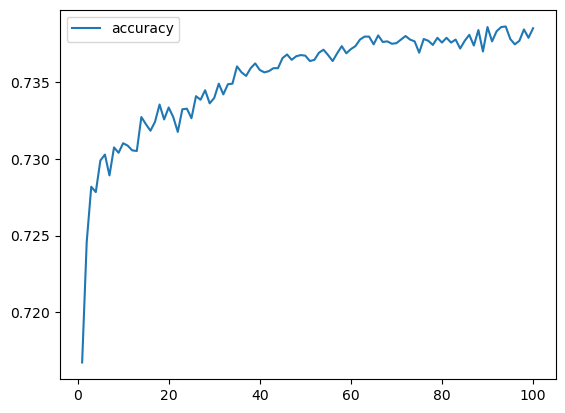

In [15]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [16]:
# Drop the non-beneficial ID columns
cleaned_application_df= application_df.drop(columns = ['EIN', 'NAME', 'ASK_AMT', 'USE_CASE', 'SPECIAL_CONSIDERATIONS'])
cleaned_application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,ORGANIZATION,STATUS,INCOME_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,Association,1,0,1
1,T3,Independent,C2000,Co-operative,1,1-9999,1
2,T5,CompanySponsored,C3000,Association,1,0,0
3,T3,CompanySponsored,C2000,Trust,1,10000-24999,1
4,T3,Independent,C1000,Trust,1,100000-499999,1
...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,Association,1,0,0
34295,T4,CompanySponsored,C3000,Association,1,0,0
34296,T3,CompanySponsored,C2000,Association,1,0,0
34297,T5,Independent,C3000,Association,1,0,1


In [17]:
cleaned_application_df.nunique()

APPLICATION_TYPE    17
AFFILIATION          6
CLASSIFICATION      71
ORGANIZATION         4
STATUS               2
INCOME_AMT           9
IS_SUCCESSFUL        2
dtype: int64

In [18]:
# Look at APPLICATION_TYPE value counts for binning
type_counts=  cleaned_application_df['APPLICATION_TYPE'].value_counts()
type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [19]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace_two = list(type_counts.iloc[8:].index)
cutoff_value = 2000
# Replace in dataframe
for app in application_types_to_replace:
    cleaned_application_df['APPLICATION_TYPE'] = cleaned_application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
cleaned_application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [20]:
# Look at CLASSIFICATION value counts for binning
classification_types = first_application_df['CLASSIFICATION'].value_counts()
classification_types

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [21]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classification_to_replace = list(classification_types.iloc[5:].index)
cutoff_classifications = 25000

# Replace in dataframe
for cls in classification_to_replace:
    cleaned_application_df['CLASSIFICATION'] = cleaned_application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
cleaned_application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [22]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(cleaned_application_df)
dummies.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [23]:
# Split our preprocessed data into our features and target arrays
y = dummies['IS_SUCCESSFUL'].values
X = dummies.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
hidden_nodes_layer1 = 500
hidden_nodes_layer2 = 800

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 500)               18000     
                                                                 
 dense_4 (Dense)             (None, 800)               400800    
                                                                 
 dense_5 (Dense)             (None, 1)                 801       
                                                                 
Total params: 419601 (1.60 MB)
Trainable params: 419601 (1.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [27]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=180)


Epoch 1/180
804/804 [==============================] - 8s 9ms/step - loss: 0.5687 - accuracy: 0.7243
Epoch 2/180
804/804 [==============================] - 8s 10ms/step - loss: 0.5567 - accuracy: 0.7292
Epoch 3/180
804/804 [==============================] - 11s 13ms/step - loss: 0.5541 - accuracy: 0.7307
Epoch 4/180
804/804 [==============================] - 12s 15ms/step - loss: 0.5522 - accuracy: 0.7338
Epoch 5/180
804/804 [==============================] - 13s 16ms/step - loss: 0.5517 - accuracy: 0.7319
Epoch 6/180
804/804 [==============================] - 16s 19ms/step - loss: 0.5512 - accuracy: 0.7324
Epoch 7/180
804/804 [==============================] - 13s 17ms/step - loss: 0.5510 - accuracy: 0.7321
Epoch 8/180
804/804 [==============================] - 17s 22ms/step - loss: 0.5499 - accuracy: 0.7329
Epoch 9/180
804/804 [==============================] - 17s 22ms/step - loss: 0.5491 - accuracy: 0.7331
Epoch 10/180
804/804 [==============================] - 12s 15ms/step - loss

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 2s - loss: 0.5910 - accuracy: 0.7250 - 2s/epoch - 6ms/step
Loss: 0.5910101532936096, Accuracy: 0.7250145673751831


<Axes: >

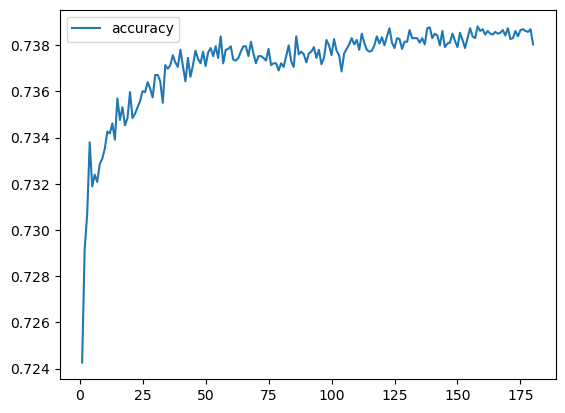

In [29]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

Third Attempt

In [30]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
third_application_df= application_df.drop(columns = ['EIN', 'USE_CASE', 'STATUS'])
third_application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,Association,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Co-operative,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,Association,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Trust,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Trust,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,Association,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,Association,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Association,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,Association,0,N,5000,1


In [31]:
# Determine the number of unique values in each column.
third_application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [32]:
# Look at NAME value counts for binning
type_counts=  third_application_df['NAME'].value_counts()
type_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [33]:
# Choose a cutoff value and create a list of name types to be replaced
# use the variable name `name_types_to_replace`
name_types_to_replace = list(type_counts.iloc[8:].index)
cutoff_value = 7889
# Replace in dataframe
for app in name_types_to_replace:
    third_application_df['NAME'] = third_application_df['NAME'].replace(app,"Other")

# Check to make sure binning was successful
third_application_df['NAME'].value_counts()

Other                                              29662
PARENT BOOSTER USA INC                              1260
TOPS CLUB INC                                        765
UNITED STATES BOWLING CONGRESS INC                   700
WASHINGTON STATE UNIVERSITY                          492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC      408
PTA TEXAS CONGRESS                                   368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC        331
ALPHA PHI SIGMA                                      313
Name: NAME, dtype: int64

In [34]:
# Look at APPLICATION_TYPE value counts for binning
type_counts=  third_application_df['APPLICATION_TYPE'].value_counts()
type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [35]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
applications_types_to_replace = list(type_counts.iloc[8:].index)
cutoff_value = 8474
# Replace in dataframe
for app in applications_types_to_replace:
    third_application_df['APPLICATION_TYPE'] = third_application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
third_application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [36]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(third_application_df)
dummies.head()

,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_PTA TEXAS CONGRESS,NAME_SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,NAME_TOPS CLUB INC,NAME_UNITED STATES BOWLING CONGRESS INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,108590,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,5000,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6692,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,142590,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [37]:
# Split our preprocessed data into our features and target arrays
y = dummies['IS_SUCCESSFUL'].values
X = dummies.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [38]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
hidden_nodes_layer1 = 909
hidden_nodes_layer2 = 398

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 909)               101808    
                                                                 
 dense_7 (Dense)             (None, 398)               362180    
                                                                 
 dense_8 (Dense)             (None, 1)                 399       
                                                                 
Total params: 464387 (1.77 MB)
Trainable params: 464387 (1.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [41]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)


Epoch 1/100
804/804 [==============================] - 12s 14ms/step - loss: 0.5434 - accuracy: 0.7306
Epoch 2/100
804/804 [==============================] - 12s 15ms/step - loss: 0.5250 - accuracy: 0.7386
Epoch 3/100
804/804 [==============================] - 15s 18ms/step - loss: 0.5216 - accuracy: 0.7426
Epoch 4/100
804/804 [==============================] - 13s 16ms/step - loss: 0.5195 - accuracy: 0.7433
Epoch 5/100
804/804 [==============================] - 13s 17ms/step - loss: 0.5189 - accuracy: 0.7439
Epoch 6/100
804/804 [==============================] - 14s 18ms/step - loss: 0.5174 - accuracy: 0.7448
Epoch 7/100
804/804 [==============================] - 13s 17ms/step - loss: 0.5160 - accuracy: 0.7449
Epoch 8/100
804/804 [==============================] - 15s 18ms/step - loss: 0.5163 - accuracy: 0.7458
Epoch 9/100
804/804 [==============================] - 15s 19ms/step - loss: 0.5151 - accuracy: 0.7459
Epoch 10/100
804/804 [==============================] - 15s 18ms/step - l

In [42]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6054 - accuracy: 0.7485 - 1s/epoch - 4ms/step
Loss: 0.605384886264801, Accuracy: 0.7484548091888428


<Axes: >

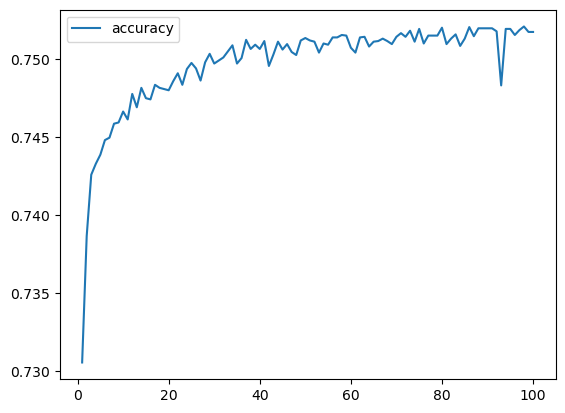

In [43]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [44]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")


/Applications/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
